In [285]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

%matplotlib inline

### 1. Dataset

In [286]:
dataset = pd.read_csv("mouse_viral_study.csv")
dataset

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
...,...,...,...
395,2.884122,3.271748,1
396,7.290855,9.488672,0
397,7.895325,8.272529,0
398,2.690592,2.674979,1


In [287]:
X = dataset[['Med_1_mL', 'Med_2_mL']].values
y = dataset[['Virus Present']].values

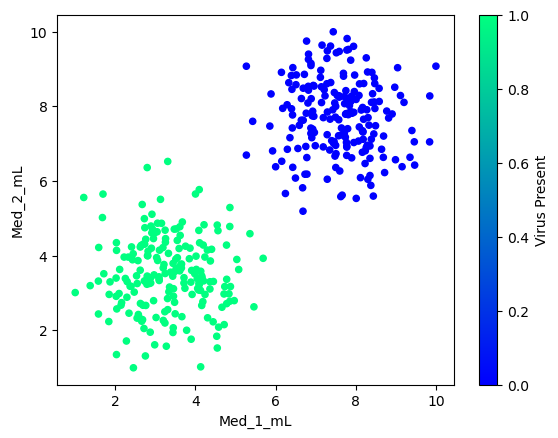

In [288]:
dataset.plot.scatter(x='Med_1_mL',y='Med_2_mL', c='Virus Present', colormap='winter')
plt.show()

In [289]:
# Séparer les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 2. Modèle


In [290]:
# La fonction sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [291]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [292]:
# Modèle
def modele(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A

W,b=initialisation(X)
modele(X, W, b)

### 3. Fonction Coût 

In [293]:
def log_loss(y, A):
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

### 4. Optimisation - Gradient et Descente de Gradient

In [294]:
def gradients(X, A, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db)

In [295]:
def optimisation(X, W, b, A, y, learning_rate):
    dW, db = gradients(X, A, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

### 5. Prédiction

In [296]:
def predict(X, W, b):
    A = modele(X, W, b)
    print(A)
    return A >= 0.5

### 5. Modèle final

In [297]:
def regression_logistique(X, y, learning_rate=0.1, n_iter=10000):
  # Initialisation
    W, b = initialisation(X)
    loss_history = []
  # Entrainement
    for i in range(n_iter):
        A = modele(X, W, b)
        loss_history.append(log_loss(y, A))
        W, b = optimisation(X, W, b, A, y, learning_rate=0.1)

  # Prediction
    plt.plot(loss_history)
    plt.xlabel('n_iteration')
    plt.ylabel('Log_loss')
    plt.title('Evolution des erreurs')
    return W,b

In [298]:
# W,b=regression_logistique(X, y)

In [299]:
W,b=regression_logistique(X_train, y_train)

### 5. 1 Evaluation du modèle et Visualisation


In [300]:
from sklearn.metrics import accuracy_score
y_pred = predict(X_test, W, b)
print("Accuracy=",accuracy_score(y_test, y_pred))

[[8.34316866e-03]
 [9.94614833e-01]
 [5.86912122e-03]
 [4.35696392e-04]
 [9.73830427e-01]
 [4.45044434e-04]
 [1.58816800e-02]
 [9.87890586e-01]
 [9.89038011e-01]
 [1.93448611e-03]
 [9.84939577e-01]
 [9.89127134e-01]
 [2.26055093e-03]
 [2.07008328e-03]
 [9.95309110e-01]
 [9.51473404e-01]
 [9.48046071e-01]
 [3.35996512e-03]
 [8.88408813e-01]
 [5.85998699e-03]
 [9.98079302e-01]
 [6.49995608e-04]
 [8.88309853e-04]
 [1.34964701e-02]
 [5.82669298e-03]
 [7.00862260e-04]
 [2.39835176e-04]
 [9.98619139e-01]
 [1.21299274e-02]
 [3.95670803e-03]
 [9.97309141e-01]
 [7.00199838e-01]
 [9.97379399e-01]
 [1.13409671e-03]
 [4.28216462e-03]
 [1.95662136e-03]
 [8.06142912e-01]
 [9.91915917e-01]
 [1.72906336e-02]
 [9.49329975e-03]
 [9.83260655e-01]
 [1.48140142e-03]
 [9.94275414e-01]
 [4.97960498e-03]
 [7.60460042e-04]
 [9.93008550e-01]
 [1.85200601e-02]
 [9.99376612e-01]
 [1.87767211e-04]
 [5.43100021e-04]
 [9.88285874e-01]
 [9.60977586e-01]
 [1.15203813e-03]
 [9.96897359e-01]
 [7.70085970e-03]
 [9.961542

[0.64354039]
[ True]
[0.00020303]
[False]
[0.99998976]
[ True]


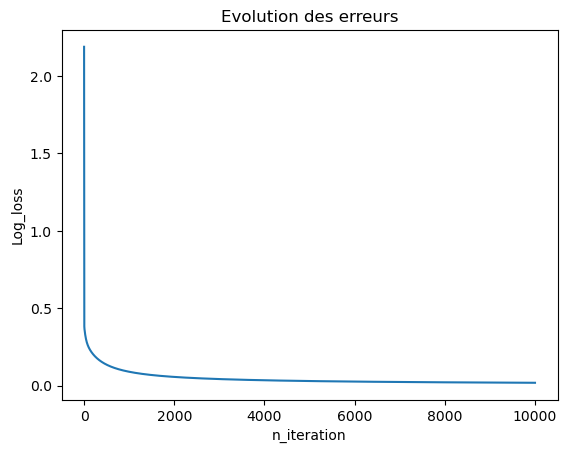

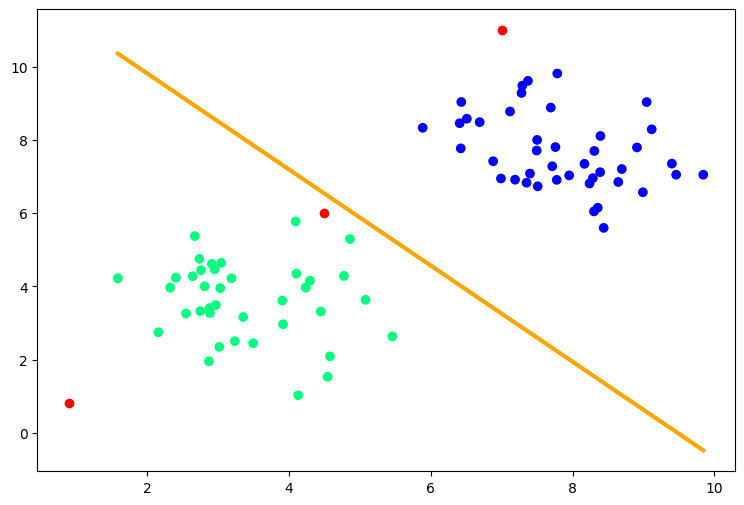

In [301]:
# Visualiser le dataset
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X_test[:,0], X_test[:, 1], c=y_test, cmap='winter')

# Dessiner la frontière de décision
#x1 = np.linspace(0, 10, 200)
x1 = np.linspace(np.min(X_test[:,0]),np.max(X_test[:,0]), 320)
x2 = ( - W[0] * x1 - b) / W[1]
ax.plot(x1, x2, c='orange', lw=3)

# Prédire la classe de nouveaux éléments

new_1=np.array([4.5,6])
new_2=np.array([7,11])
new_3=np.array([0.9,0.8])
ax.scatter(new_1[0], new_1[1], c='r')
ax.scatter(new_2[0], new_2[1], c='r')
ax.scatter(new_3[0], new_3[1], c='r')
print(predict(new_1, W, b))
print(predict(new_2, W, b))
print(predict(new_3, W, b))

plt.show()

In [302]:
#Affichage de la matrice de confusion

from sklearn.metrics import confusion_matrix
y_pred = predict(X_test, W, b)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8.34316866e-03]
 [9.94614833e-01]
 [5.86912122e-03]
 [4.35696392e-04]
 [9.73830427e-01]
 [4.45044434e-04]
 [1.58816800e-02]
 [9.87890586e-01]
 [9.89038011e-01]
 [1.93448611e-03]
 [9.84939577e-01]
 [9.89127134e-01]
 [2.26055093e-03]
 [2.07008328e-03]
 [9.95309110e-01]
 [9.51473404e-01]
 [9.48046071e-01]
 [3.35996512e-03]
 [8.88408813e-01]
 [5.85998699e-03]
 [9.98079302e-01]
 [6.49995608e-04]
 [8.88309853e-04]
 [1.34964701e-02]
 [5.82669298e-03]
 [7.00862260e-04]
 [2.39835176e-04]
 [9.98619139e-01]
 [1.21299274e-02]
 [3.95670803e-03]
 [9.97309141e-01]
 [7.00199838e-01]
 [9.97379399e-01]
 [1.13409671e-03]
 [4.28216462e-03]
 [1.95662136e-03]
 [8.06142912e-01]
 [9.91915917e-01]
 [1.72906336e-02]
 [9.49329975e-03]
 [9.83260655e-01]
 [1.48140142e-03]
 [9.94275414e-01]
 [4.97960498e-03]
 [7.60460042e-04]
 [9.93008550e-01]
 [1.85200601e-02]
 [9.99376612e-01]
 [1.87767211e-04]
 [5.43100021e-04]
 [9.88285874e-01]
 [9.60977586e-01]
 [1.15203813e-03]
 [9.96897359e-01]
 [7.70085970e-03]
 [9.961542

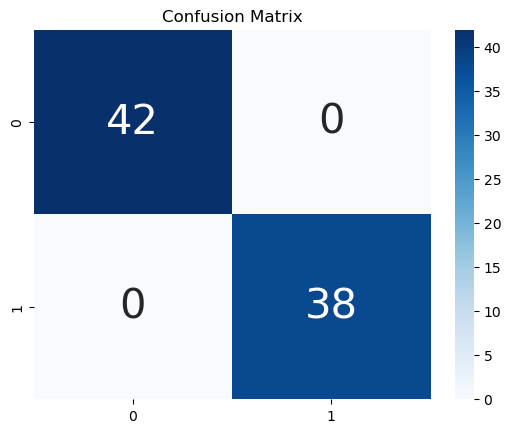

In [303]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
# confusion matrix sns heatmap 
## https://www.kaggle.com/agungor2/various-confusion-matrix-plots
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()